In [1]:
import pandas as pd 
# suncare_top30
#긍/부/중 문장 리스트 파일 가져오기
# rc_positive_list_df = pd.read_excel(r"C:\Users\82108\Desktop\final\rc_positive_list.xlsx")
# rc_negative_list_df = pd.read_excel(r"C:\Users\82108\Desktop\final\rc_negative_list.xlsx")
# rc_neutral_list_df = pd.read_excel(r"C:\Users\82108\Desktop\final\rc_neutral_list.xlsx")

top_crc3_positive_list_df = pd.read_excel(r"C:\Users\82108\Desktop\final\top_crc3_positive_list.xlsx")
top_crc3_negative_list_df = pd.read_excel(r"C:\Users\82108\Desktop\final\top_crc3_negative_list.xlsx")
top_crc3_neutral_list_df = pd.read_excel(r"C:\Users\82108\Desktop\final\top_crc3_neutral_list.xlsx")

## 좋X(3333)

In [2]:
top_crc3_positive_list_df

,text
0,잘 사용
1,감사
2,샘플 챙기 주 시 감사
3,진짜 필수
4,항상 올리브 영 제품 잘 구매 있
...,...
15947,장점 끈적이 크림 제형 젤 제형 선 젤 백 탁 없이 촉촉하 크림 제형 선 젤 제형 ...
15948,선 젤 산뜻 보습 정도 있 선 젤 여성 분 선 젤 바르 화장 밀리 현상 거의 없 피...
15949,자외선 차단 기능 서 젤 효능 효과 보 피부 미백 및 피부 주름 개선 효과 있 선 젤
15950,발림 잘 올라가


In [3]:
from collections import Counter


# 직접적인 단어 빈도 계산
# 텍스트를 공백 기준으로 분할하여 모든 단어를 리스트로 만듦
top_crc3_positive_words = top_crc3_positive_list_df['text'].str.split().sum()
top_crc3_negative_words = top_crc3_negative_list_df['text'].str.split().sum()
top_crc3_neutral_words = top_crc3_neutral_list_df['text'].str.split().explode().tolist()
# 단어들의 빈도를 계산
top_crc3_positive_words_freq = Counter(top_crc3_positive_words)
top_crc3_negative_words_freq = Counter(top_crc3_negative_words)
top_crc3_neutral_words_freq = Counter(top_crc3_neutral_words)

# 빈도 데이터를 데이터프레임으로 변환하여 정렬
top_crc3_positive_words_freq_df = pd.DataFrame(top_crc3_positive_words_freq.items(), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False).reset_index(drop=True)
top_crc3_negative_words_freq_df = pd.DataFrame(top_crc3_negative_words_freq.items(), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False).reset_index(drop=True)
top_crc3_neutral_words_freq_df = pd.DataFrame(top_crc3_neutral_words_freq.items(), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False).reset_index(drop=True)

# 상위 10개 단어 출력
top_crc3_positive_words_freq_df.head(30)


,단어,빈도
0,잘,9442
1,있,3670
2,쓰,3625
3,바르,3348
4,크림,3295
5,만족,2439
6,사용,2322
7,되,2117
8,같,2088
9,피부,2018


In [4]:
import pandas as pd

#crc
# 행 선택
negative_top_30 = top_crc3_negative_words_freq_df[0:30]
positive_top_30 = top_crc3_positive_words_freq_df[0:30]

# 부정 프레임과 긍정 프레임의 단어 리스트 추출
negative_words = set(negative_top_30['단어'])  
positive_words = set(positive_top_30['단어'])  

# 중복 단어 필터링
common_words = negative_words & positive_words

# 중복 단어를 제외한 부정 단어 리스트
unique_negative_df = negative_top_30[~negative_top_30['단어'].isin(common_words)]
unique_positive_df = positive_top_30[~positive_top_30['단어'].isin(common_words)]

# 고유 부정/긍정 단어 리스트를 빈도 순으로 정렬
unique_negative_df_sorted = unique_negative_df.sort_values(by='빈도', ascending=False)
unique_positive_df_sorted = unique_positive_df.sort_values(by='빈도', ascending=False)

# 결과 출력
print("Suncare_top 고유 부정 단어 리스트:")
print(unique_negative_df_sorted['단어'].tolist())

print("Suncare_top 고유 긍정 단어 리스트:")
print(unique_positive_df_sorted['단어'].tolist())


Suncare_top 고유 부정 단어 리스트:
['부담', '수분', '지성', '부족', '걱정', '나', '수', '불편', '화']
Suncare_top 고유 긍정 단어 리스트:
['만족', '발리', '구매', '화장', '사', '자외선', '톤', '발림', '맞']


In [11]:
unique_negative_df

,단어,빈도
4,부담,620
13,수분,345
14,지성,330
17,부족,311
18,걱정,295
23,나,256
24,수,228
27,불편,191
28,화,184


In [5]:
# #crc
# # 행 선택
# negative_top_30 = top_crc3_negative_words_freq_df[0:30]
# positive_top_30 = top_crc3_positive_words_freq_df[0:30]

# # 부정 프레임과 긍정 프레임의 단어 리스트 추출
# negative_words = set(negative_top_30['단어'])  
# positive_words = set(positive_top_30['단어'])  

# # 중복 단어만 필터링
# common_words = negative_words & positive_words

# common_negative_df = negative_top_30[negative_top_30['단어'].isin(common_words)]
# common_positive_df = positive_top_30[positive_top_30['단어'].isin(common_words)]

# # 중복 단어를 제외한 데이터프레임 필터링
# filtered_negative_df = negative_top_30[~negative_top_30['단어'].isin(common_words)]
# filtered_positive_df = positive_top_30[~positive_top_30['단어'].isin(common_words)]

# # 결과 출력
# print("두 데이터프레임에 공통으로 있는 단어:")
# print(pd.concat([common_negative_df, common_positive_df], axis=1))

In [6]:
# # crc
# print("\n중복 단어를 제외한 긍정 단어 빈도:")
# print(filtered_positive_df)

In [7]:
# # crc
# print("\n중복 단어를 제외한 부정 단어 빈도:")
# print(filtered_negative_df)

# word cloud

## 부정

In [8]:
#부정
#불필요한 글자 제거
df_word = unique_negative_df_sorted.drop(index=[23,24])
df_word

,단어,빈도
4,부담,620
13,수분,345
14,지성,330
17,부족,311
18,걱정,295
27,불편,191
28,화,184


In [9]:
# DataFrame -> Dictionary
dic_word = df_word.set_index('단어').to_dict()['빈도']
dic_word

{'부담': 620, '수분': 345, '지성': 330, '부족': 311, '걱정': 295, '불편': 191, '화': 184}

In [10]:
# 채택!!
import numpy as np
from wordcloud import WordCloud #워드클라우드 제작 라이브러리
import matplotlib.pyplot as plt  #워드클라우드 시각화 라이브러리

# 워드클라우드에서 각 단어에 적용할 색상을 결정하는 함수
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 색조(hue)를 50에서 100 사이의 랜덤 값으로 설정
    hue_choices = [77,1]    #np.random.randint(50, 100)   # 색상의 기본 톤
    hue = np.random.choice(hue_choices)
    # 채도(saturation)을 63, 80으로 지정
    saturation_choices = [63,80]
    saturation = np.random.choice(saturation_choices)
    
    # 밝기는 랜덤 범위로 설정
    lightness = np.random.randint(50, 80)   # 50%에서 80% 사이의 랜덤 밝기
    
    # hsl 형식으로 색상 값을 반환
    return f"hsl({hue}, {saturation}%, {lightness}%)"

font_path=r"C:\대학교\학생성장지원시스템\(탈잉)실무에 가장 많이 쓰는 PPT 디자인\Jalnan.ttf"

#wordcloud 함수 사용
wc = WordCloud(random_state=42,font_path= font_path , width = 400,
               height = 400, background_color = 'white', color_func = color_func )
img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) #크기 지정하기
plt.axis('off') #축 없애기
plt.imshow(img_wordcloud) #결과 보여주기
plt.savefig('Suncare_top_negative_wordcloud') #파일 저장

KeyboardInterrupt: 

## 긍정

In [ ]:
# 긍정
# 불필요한 단어 제거
df_word2 = unique_positive_df_sorted.drop(index=[12,23,29])
df_word2

,단어,빈도
5,만족,2439
19,구매,1305
21,화장,1260
26,자외선,882
27,톤,861
28,발림,859


In [ ]:
# DataFrame -> Dictionary
dic_word2 = df_word2.set_index('단어').to_dict()['빈도']
dic_word2

{'만족': 2439, '구매': 1305, '화장': 1260, '자외선': 882, '톤': 861, '발림': 859}

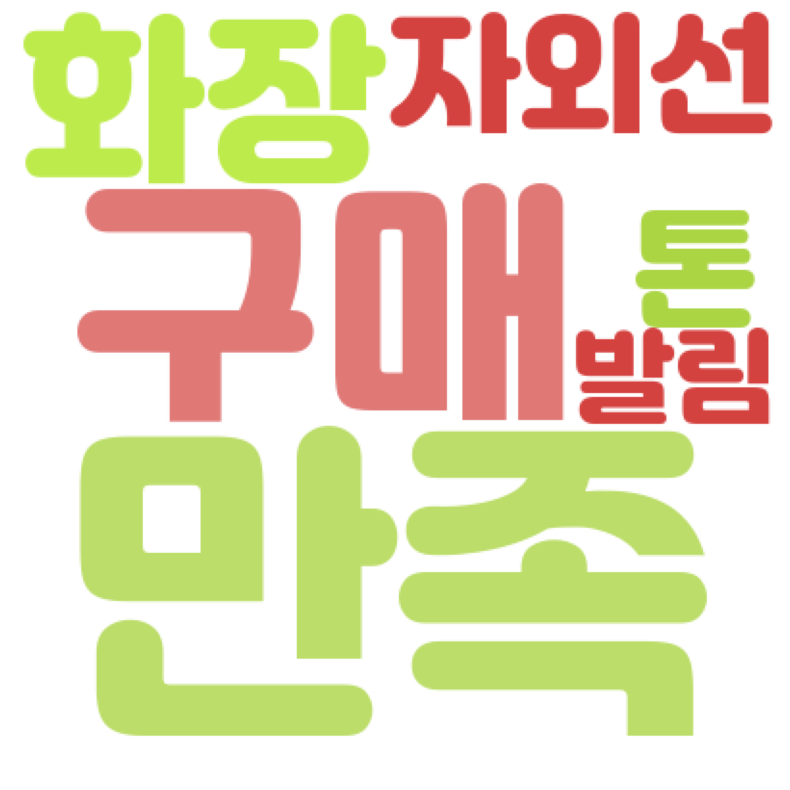

In [ ]:
# 채택!!
import numpy as np
from wordcloud import WordCloud #워드클라우드 제작 라이브러리
import matplotlib.pyplot as plt  #워드클라우드 시각화 라이브러리

# 워드클라우드에서 각 단어에 적용할 색상을 결정하는 함수
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 색조(hue)를 50에서 100 사이의 랜덤 값으로 설정
    hue_choices = [77,1]    #np.random.randint(50, 100)   # 색상의 기본 톤
    hue = np.random.choice(hue_choices)
    # 채도(saturation)을 63, 80으로 지정
    saturation_choices = [63,80]
    saturation = np.random.choice(saturation_choices)
    
    # 밝기는 랜덤 범위로 설정
    lightness = np.random.randint(50, 80)   # 50%에서 80% 사이의 랜덤 밝기
    
    # hsl 형식으로 색상 값을 반환
    return f"hsl({hue}, {saturation}%, {lightness}%)"

font_path=r"C:\대학교\학생성장지원시스템\(탈잉)실무에 가장 많이 쓰는 PPT 디자인\Jalnan.ttf"

#wordcloud 함수 사용
wc = WordCloud(random_state=42,font_path= font_path , width = 400,
               height = 400, background_color = 'white', color_func = color_func )
img_wordcloud = wc.generate_from_frequencies(dic_word2)

plt.figure(figsize = (10, 10)) #크기 지정하기
plt.axis('off') #축 없애기
plt.imshow(img_wordcloud) #결과 보여주기
plt.savefig('Suncare_top_positive_wordcloud') #파일 저장